In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("medical_examination.csv")
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
# Check to see if there are any null values
df.isnull().values.any()

False

In [4]:
# converting height in cm to mt
df["height"] = df["height"]/100

In [5]:
# Calculating people's BMIs (BMI = weight / height**2)
df["overweight"] = df["weight"] / (df["height"]**2)


In [6]:
#Iterating over rows of overweight column and assign 0 for NOT overweight and 1 for overweight.
def change_values(overweight):
    if overweight > 25:
        return 1
    else:
        return 0
df["overweight"] = df.overweight.apply(change_values)
df["overweight"].value_counts()

1    43546
0    26454
Name: overweight, dtype: int64

In [7]:
# Normalizing the dataset. 0 will be good, 1 will be bad. 
# If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.
# Measuring the elapsed time to see how fast is apply() method
from timeit import default_timer as timer
start = timer()

def normalize_data(column):
    if int(column) == 1:
        return 0
    else:
        return 1
df["cholesterol"] = df.cholesterol.apply(normalize_data)
df["gluc"] = df.gluc.apply(normalize_data)

end = timer()
print(end - start)

0.08624559999999981


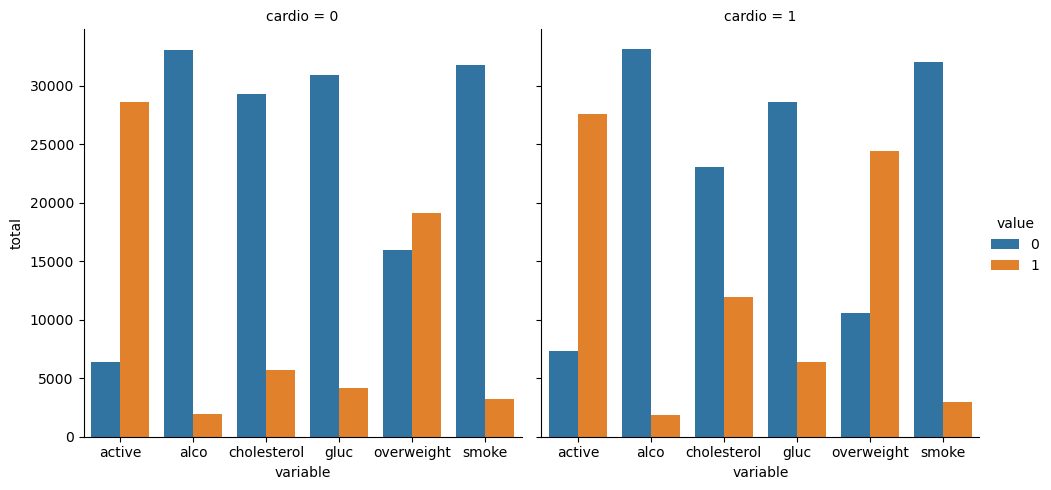

In [8]:
# Draw Categorical Plot
# Create DataFrame for cat plot using `pd.melt` using just the values from 
#'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df,id_vars="cardio",value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. 
# You will have to rename one of the columns for the catplot to work correctly.
#(adding a copy of "value" column at the end of the df and naming it "total")
df_cat["total"]= df_cat["value"].copy()

#(grouping the data and showing counts)
df_cat=df_cat.groupby(["cardio","variable","value"],as_index=False).count()
df_cat

# Draw the catplot with 'sns.catplot()' and save it
fig = sns.catplot(x='variable', y='total', hue='value', col='cardio', kind='bar', data=df_cat).fig
fig.savefig('catplot.png')

In [9]:
# Draw Heat Map

# Clean the data
# remove the outliers
df_heat = df[(df['ap_lo'] <= df['ap_hi'])&
             (df['height'] >= df['height'].quantile(0.025))&
             (df['height'] <= df['height'].quantile(0.975))&
             (df['weight'] >= df['weight'].quantile(0.025))&
             (df['weight'] <= df['weight'].quantile(0.975))]


In [10]:
# Calculate the correlation matrix
corr = df_heat.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [11]:
# Generate a mask for the upper triangle
mask = np.triu(corr)


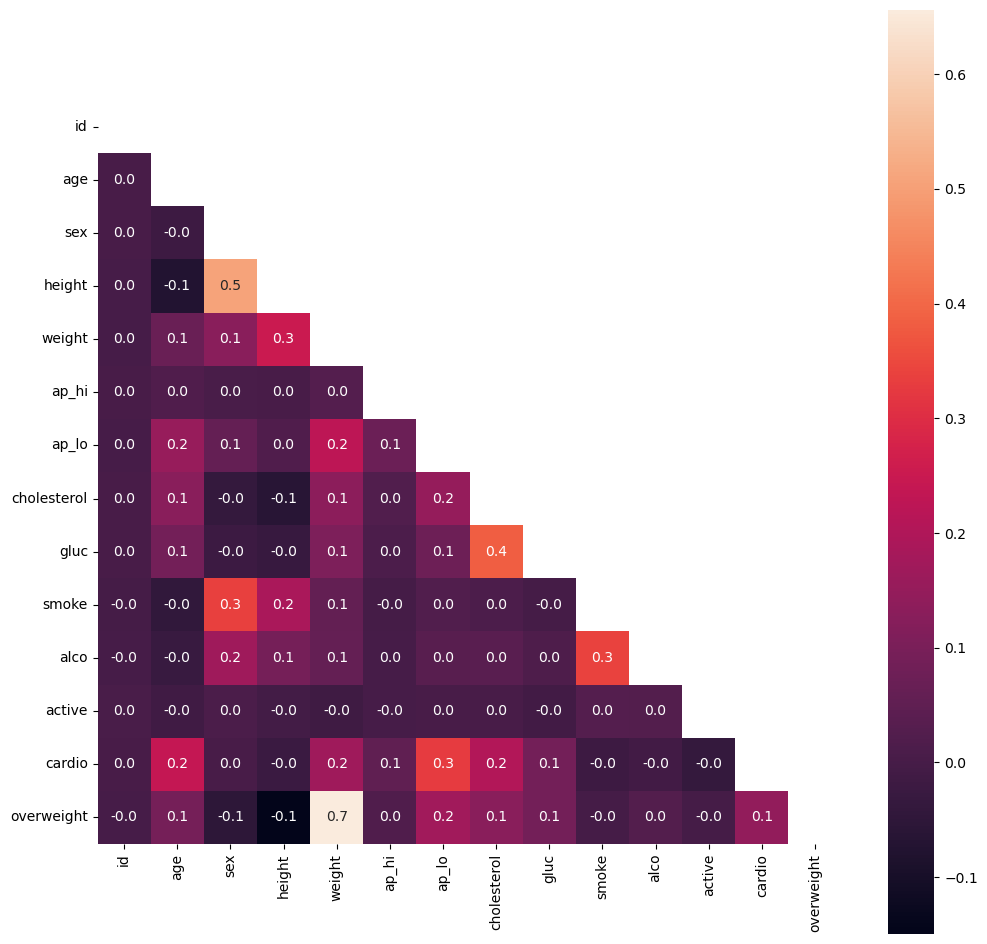

In [12]:
# Draw the heatmap with 'sns.heatmap()' and save it
fig, ax = plt.subplots(figsize=(12,12))
heat_map = sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", square=True, linewidths=0.001)
fig.savefig('heatmap.png')